In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from calendar import month_abbr

In [3]:
df = pd.read_csv('Rosario Temperatures Dataset.csv')
df.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,ARM00087480,"ROSARIO, AR",2012-01-01,NaN,NaN,78,90.0,69.0
1,ARM00087480,"ROSARIO, AR",2012-01-02,NaN,NaN,78,NaN,60.0
2,ARM00087480,"ROSARIO, AR",2012-01-03,NaN,NaN,79,94.0,69.0
3,ARM00087480,"ROSARIO, AR",2012-01-04,NaN,NaN,77,89.0,61.0
4,ARM00087480,"ROSARIO, AR",2012-01-05,NaN,NaN,79,NaN,59.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4016 non-null   object 
 1   NAME     4016 non-null   object 
 2   DATE     4016 non-null   object 
 3   PRCP     1216 non-null   float64
 4   SNWD     36 non-null     float64
 5   TAVG     4016 non-null   int64  
 6   TMAX     1811 non-null   float64
 7   TMIN     3321 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 251.1+ KB


In [5]:
df = df[['DATE', 'TAVG', 'TMAX', 'TMIN']]
df.head()

,DATE,TAVG,TMAX,TMIN
0,2012-01-01,78,90.0,69.0
1,2012-01-02,78,NaN,60.0
2,2012-01-03,79,94.0,69.0
3,2012-01-04,77,89.0,61.0
4,2012-01-05,79,NaN,59.0


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    4016 non-null   datetime64[ns]
 1   TAVG    4016 non-null   int64         
 2   TMAX    1811 non-null   float64       
 3   TMIN    3321 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 125.6 KB


In [8]:
# Convert °F to °C:
def f_to_c(value):
    return round((value - 32)*5/9, 2)

df[['TAVG', 'TMAX', 'TMIN']] = df[['TAVG', 'TMAX', 'TMIN']].apply(f_to_c)
df.head()


,DATE,TAVG,TMAX,TMIN
0,2012-01-01,25.56,32.22,20.56
1,2012-01-02,25.56,NaN,15.56
2,2012-01-03,26.11,34.44,20.56
3,2012-01-04,25.00,31.67,16.11
4,2012-01-05,26.11,NaN,15.00


In [9]:
# There are 298 rows where TMAX = TMIN = NaN

mask = df['TMAX'].isna() & df['TMIN'].isna()
df[mask]


,DATE,TAVG,TMAX,TMIN
34,2012-02-04,27.78,NaN,NaN
55,2012-02-25,23.89,NaN,NaN
60,2012-03-01,20.00,NaN,NaN
80,2012-03-21,22.78,NaN,NaN
85,2012-03-26,18.89,NaN,NaN
...,...,...,...,...
4003,2022-12-19,25.56,NaN,NaN
4004,2022-12-20,27.22,NaN,NaN
4006,2022-12-22,28.33,NaN,NaN
4011,2022-12-27,24.44,NaN,NaN


In [10]:
# drop the TMAX = TMIN = NaN Rows
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3718 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    3718 non-null   datetime64[ns]
 1   TAVG    3718 non-null   float64       
 2   TMAX    1811 non-null   float64       
 3   TMIN    3321 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 145.2 KB


In [11]:
# replace TMAX NaNs with TMAX = 2TAVG - TMIN
# replace TMIN NaNs with TMIN = 2TAVG - TMAX

df['TMAX'] = df.apply(lambda row: 2 * row['TAVG'] - row['TMIN'] if np.isnan(row['TMAX']) else row['TMAX'], axis=1)
df['TMIN'] = df.apply(lambda row: 2 * row['TAVG'] - row['TMAX'] if np.isnan(row['TMIN']) else row['TMIN'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3718 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    3718 non-null   datetime64[ns]
 1   TAVG    3718 non-null   float64       
 2   TMAX    3718 non-null   float64       
 3   TMIN    3718 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 145.2 KB


In [13]:
## we have leap years: 2012-2016-2020. 
# drop values corresponding to 02-29
dates = ['2012-02-29', '2016-02-29', '2020-02-29']
df = df[~df['DATE'].isin(dates)]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    3715 non-null   datetime64[ns]
 1   TAVG    3715 non-null   float64       
 2   TMAX    3715 non-null   float64       
 3   TMIN    3715 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 145.1 KB


In [15]:
# separete 2022 data for posterior use
df_2022 = df[df['DATE'].dt.year == 2022]

In [16]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 3651 to 4015
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    290 non-null    datetime64[ns]
 1   TAVG    290 non-null    float64       
 2   TMAX    290 non-null    float64       
 3   TMIN    290 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.3 KB


In [17]:
df = df[~(df['DATE'].dt.year == 2022)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3425 entries, 0 to 3649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    3425 non-null   datetime64[ns]
 1   TAVG    3425 non-null   float64       
 2   TMAX    3425 non-null   float64       
 3   TMIN    3425 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 133.8 KB


In [19]:
# Separate into three dataframes for each type of temperature
df_avg = df[['DATE','TAVG']]
df_min = df[['DATE','TMIN']]
df_max = df[['DATE','TMAX']]

In [20]:
# Separate into three dataframes for each type of temperature data of 2022
df_2022_avg = df_2022[['DATE','TAVG']]
df_2022_min = df_2022[['DATE','TMIN']]
df_2022_max = df_2022[['DATE','TMAX']]

In [21]:
# Obtain TAVG, TMAX and TMIN for each day in the past decade:

df_avg = df_avg.groupby('DATE').agg('mean').reset_index()
df_min = df_min.groupby('DATE').agg('min').reset_index()
df_max = df_max.groupby('DATE').agg('max').reset_index()

In [22]:
df_min.head()

,DATE,TMIN
0,2012-01-01,20.56
1,2012-01-02,15.56
2,2012-01-03,20.56
3,2012-01-04,16.11
4,2012-01-05,15.00


In [23]:
## separate 2012 data in order to correct the issue that has 366 days
min_2012 = df_min[df_min['DATE'].dt.year == 2012].reset_index()
min_2012.drop(columns= 'index', inplace= True)
min_2012['DATE'] = min_2012['DATE'].dt.dayofyear
min_2012['DATE'] = min_2012['DATE'].apply(lambda x: x-1 if x > 59 else x)
max_2012 = df_max[df_max['DATE'].dt.year == 2012].reset_index()
max_2012.drop(columns= 'index', inplace= True)
max_2012['DATE'] = max_2012['DATE'].dt.dayofyear
max_2012['DATE'] = max_2012['DATE'].apply(lambda x: x-1 if x > 59 else x)
avg_2012 = df_avg[df_avg['DATE'].dt.year == 2012].reset_index()
avg_2012.drop(columns= 'index', inplace= True)
avg_2012['DATE'] = avg_2012['DATE'].dt.dayofyear
avg_2012['DATE'] = avg_2012['DATE'].apply(lambda x: x-1 if x > 59 else x)

In [24]:
## separate 2016 data in order to correct the issue that has 366 days
min_2016 = df_min[df_min['DATE'].dt.year == 2016].reset_index()
min_2016.drop(columns= 'index', inplace= True)
min_2016['DATE'] = min_2016['DATE'].dt.dayofyear
min_2016['DATE'] = min_2016['DATE'].apply(lambda x: x-1 if x > 59 else x)
max_2016 = df_max[df_max['DATE'].dt.year == 2016].reset_index()
max_2016.drop(columns= 'index', inplace= True)
max_2016['DATE'] = max_2016['DATE'].dt.dayofyear
max_2016['DATE'] = max_2016['DATE'].apply(lambda x: x-1 if x > 59 else x)
avg_2016 = df_avg[df_avg['DATE'].dt.year == 2016].reset_index()
avg_2016.drop(columns= 'index', inplace= True)
avg_2016['DATE'] = avg_2016['DATE'].dt.dayofyear
avg_2016['DATE'] = avg_2016['DATE'].apply(lambda x: x-1 if x > 59 else x)

In [25]:
## separate 2020 data in order to correct the issue that has 366 days
min_2020 = df_min[df_min['DATE'].dt.year == 2020].reset_index()
min_2020.drop(columns= 'index', inplace= True)
min_2020['DATE'] = min_2020['DATE'].dt.dayofyear
min_2020['DATE'] = min_2020['DATE'].apply(lambda x: x-1 if x > 59 else x)
max_2020 = df_max[df_max['DATE'].dt.year == 2020].reset_index()
max_2020.drop(columns= 'index', inplace= True)
max_2020['DATE'] = max_2020['DATE'].dt.dayofyear
max_2020['DATE'] = max_2020['DATE'].apply(lambda x: x-1 if x > 59 else x)
avg_2020 = df_avg[df_avg['DATE'].dt.year == 2020].reset_index()
avg_2020.drop(columns= 'index', inplace= True)
avg_2020['DATE'] = avg_2020['DATE'].dt.dayofyear
avg_2020['DATE'] = avg_2020['DATE'].apply(lambda x: x-1 if x > 59 else x)

In [26]:
df_min = df_min[~(df_min['DATE'].dt.year.isin([2012, 2016, 2020]))]
df_max = df_max[~(df_max['DATE'].dt.year.isin([2012, 2016, 2020]))]
df_avg = df_avg[~(df_avg['DATE'].dt.year.isin([2012, 2016, 2020]))]

In [27]:
df_min['DATE'] = df_min['DATE'].dt.dayofyear
df_min = pd.concat([df_min, min_2012], ignore_index= True)
df_min = pd.concat([df_min, min_2016], ignore_index= True)
df_min = pd.concat([df_min, min_2020], ignore_index= True)

In [28]:
df_max['DATE'] = df_max['DATE'].dt.dayofyear
df_max = pd.concat([df_max, max_2012], ignore_index= True)
df_max = pd.concat([df_max, max_2016], ignore_index= True)
df_max = pd.concat([df_max, max_2020], ignore_index= True)

In [29]:
df_avg['DATE'] = df_avg['DATE'].dt.dayofyear
df_avg = pd.concat([df_avg, avg_2012], ignore_index= True)
df_avg = pd.concat([df_avg, avg_2016], ignore_index= True)
df_avg = pd.concat([df_avg, avg_2020], ignore_index= True)

In [30]:
df_min = df_min.groupby('DATE').agg('min').reset_index()
df_min.head()

,DATE,TMIN
0,1,11.11
1,2,10.00
2,3,11.67
3,4,15.56
4,5,13.90


In [31]:
df_max = df_max.groupby('DATE').agg('max').reset_index()
df_max.head()

,DATE,TMAX
0,1,35.56
1,2,36.12
2,3,36.67
3,4,32.78
4,5,37.22


In [32]:
df_avg = df_avg.groupby('DATE').agg('mean').reset_index()
df_avg.head()

,DATE,TAVG
0,1,23.888889
1,2,24.074444
2,3,23.999000
3,4,24.350000
4,5,25.444000


In [33]:
df_avg['TAVG'] = round(df_avg['TAVG'], 2)
df_avg.head()

,DATE,TAVG
0,1,23.89
1,2,24.07
2,3,24.00
3,4,24.35
4,5,25.44


In [34]:
df_min.set_index('DATE', inplace= True)
df_max.set_index('DATE', inplace= True)

In [35]:
df_avg.set_index('DATE', inplace= True)

In [36]:
df_2022_avg['DATE'] = df_2022_avg['DATE'].dt.dayofyear
df_2022_avg.set_index('DATE', inplace=True)
df_2022_avg.head()

C:\Users\alter\AppData\Local\Temp\ipykernel_16296\940125046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_avg['DATE'] = df_2022_avg['DATE'].dt.dayofyear


,TAVG
DATE,
1,24.44
2,23.89
3,27.22
4,26.67
5,23.33


In [37]:
df_2022_min['DATE'] = df_2022_min['DATE'].dt.dayofyear
df_2022_min.set_index('DATE', inplace=True)
df_2022_max['DATE'] = df_2022_max['DATE'].dt.dayofyear
df_2022_max.set_index('DATE', inplace=True)

C:\Users\alter\AppData\Local\Temp\ipykernel_16296\917100679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_min['DATE'] = df_2022_min['DATE'].dt.dayofyear
C:\Users\alter\AppData\Local\Temp\ipykernel_16296\917100679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_max['DATE'] = df_2022_max['DATE'].dt.dayofyear


In [38]:
# here we obtain the dates, and its values, in wich 2022 temperature was lower than the past decade
low_values = pd.merge(df_min, df_2022_min, left_index= True, right_index= True)
low_values['flag_min'] = (low_values['TMIN_y'] < low_values['TMIN_x']).astype(int)
low_values = low_values[low_values['flag_min'] == 1]
low_values.drop(columns='TMIN_x', inplace=True)
low_values.rename(columns={'TMIN_y': 'TMIN'}, inplace=True)
low_values.drop(columns='flag_min', inplace= True)
low_values.head()

,TMIN
DATE,
38,10.56
46,13.33
60,8.89
61,11.11
67,10.56


In [39]:
# here we obtain the dates, and its values, in wich 2022 temperature was higher than the past decade
high_values = pd.merge(df_max, df_2022_max, left_index= True, right_index= True)
high_values['flag_max'] = (high_values['TMAX_y'] > high_values['TMAX_x']).astype(int)
high_values = high_values[high_values['flag_max'] == 1]
high_values.drop(columns='TMAX_x', inplace=True)
high_values.rename(columns={'TMAX_y': 'TMAX'}, inplace=True)
high_values.drop(columns='flag_max', inplace= True)
high_values.head()

,TMAX
DATE,
1,37.22
4,36.11
12,37.22
13,42.22
14,40.56


In [40]:
# we have 47 days in wich temperature was lower
len(low_values)

47

In [41]:
# we have 51 days in wich temperature was higher
len(high_values)

51

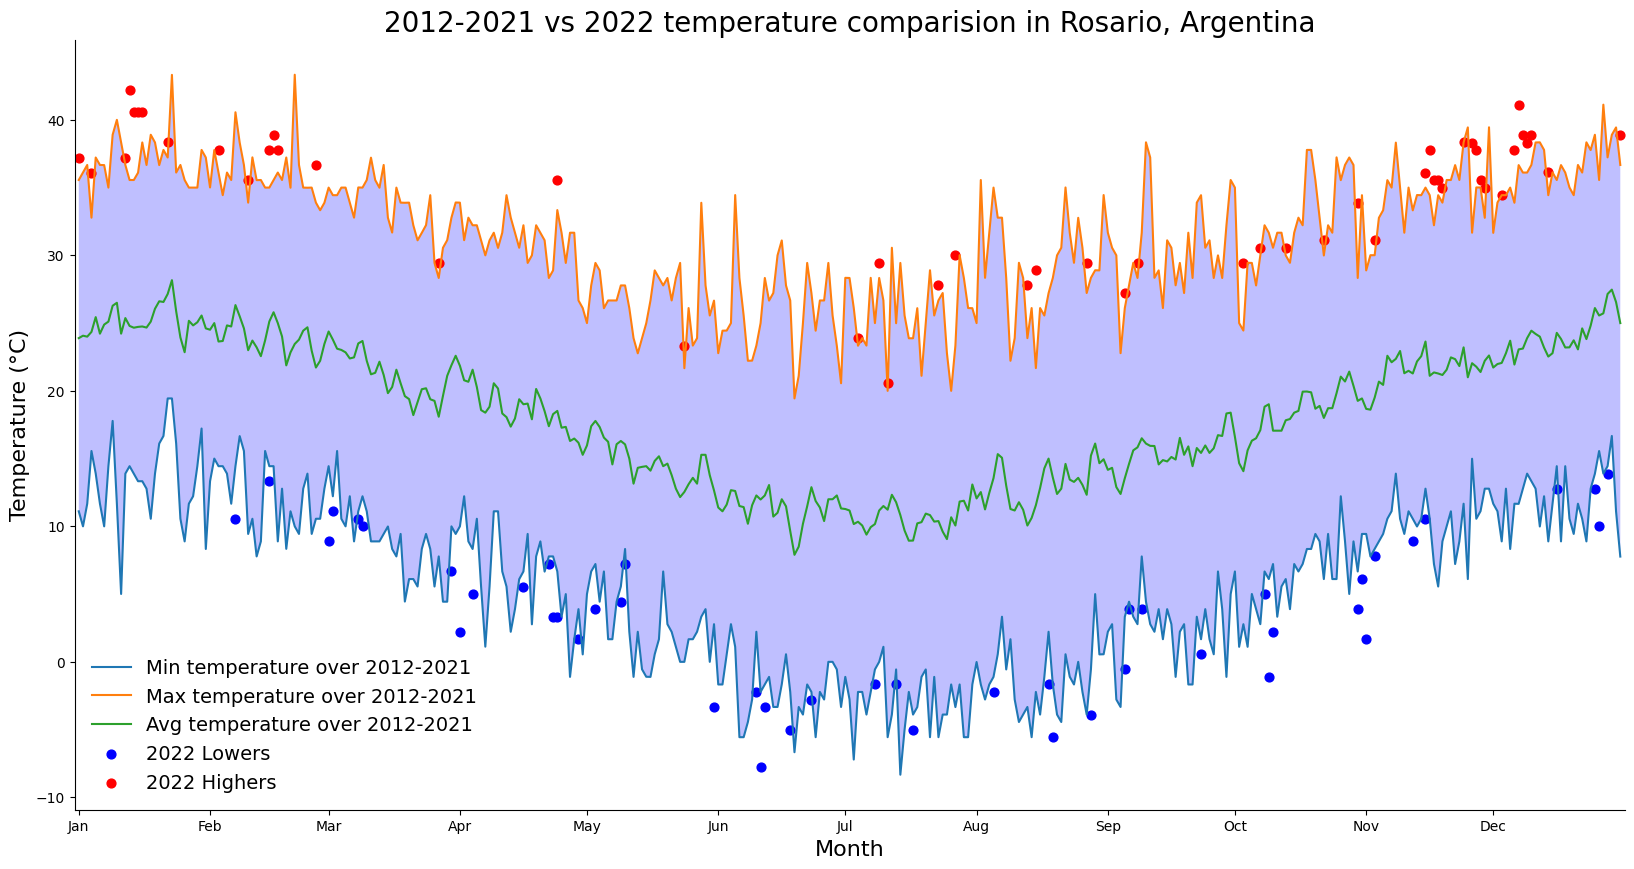

In [42]:
plt.figure(figsize=(20,10))
plt.plot(df_min['TMIN'], label= 'Min temperature over 2012-2021')
plt.plot(df_max['TMAX'],label= 'Max temperature over 2012-2021')
plt.plot(df_avg['TAVG'], label= 'Avg temperature over 2012-2021')
plt.gca().fill_between(range(1,366), 
                       df_min['TMIN'], df_max['TMAX'], 
                       facecolor='blue', 
                       alpha=0.25)
plt.scatter(list(low_values.index), low_values['TMIN'], s= 40, c= 'blue', label='2022 Lowers')
plt.scatter(list(high_values.index), high_values['TMAX'], s= 40, c= 'red', label='2022 Highers')
plt.xlabel('Month', fontsize= 16)
plt.ylabel('Temperature (°C)', fontsize= 16)
plt.title('2012-2021 vs 2022 temperature comparision in Rosario, Argentina', fontsize= 20 )
days = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months = [month_abbr[i] for i in range(1, 13)]
plt.xticks(days, months)
plt.xlim(0,366)
legend = plt.legend(loc='lower left', fontsize=14)
legend.get_frame().set_linewidth(0)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [43]:
from scipy.stats import ttest_ind


In [49]:
print('Null hypothesis: max temperatures in 2022 not significantly differ from those of the 2012-2021 decade')
print('Alternative hypothesis: max temperatures in 2022 are significantly higher than those of the 2012-2021 decade')

result = ttest_ind(df_max['TMAX'], df_2022_max['TMAX'], equal_var= False)

print(f'The t-test raised a p-value of {result[1]}')

Null hypothesis: max temperatures in 2022 not significantly differ from those of the 2012-2021 decade
Alternative hypothesis: max temperatures in 2022 are significantly higher than those of the 2012-2021 decade
The t-test raised a p-value of 4.0771879701361803e-23


In [53]:
significance_level = 0.05
if result[1] < significance_level:
    print(f'''Based on these results we can discard the null hypothesis with a significance level of {significance_level}, 
there being evidence to affirm that the max temperatures of 2022 are higher than those of the 2012-2021 decade.''')

Based on these results we can discard the null hypothesis with a significance level of 0.05, 
there being evidence to affirm that the max temperatures of 2022 are higher than those of the 2012-2021 decade.


In [74]:
print('Null hypothesis: min temperatures in 2022 not significantly differ from those of the 2012-2021 decade')
print('Alternative hypothesis: min temperatures in 2022 are significantly lower than those of the 2012-2021 decade')

result = ttest_ind(df_min['TMIN'], df_2022_min['TMIN'], equal_var= False)

print(f'The t-test raised a p-value of {result[1]}')

significance_level = 0.05

if result[1] < significance_level:
    print(f'''Based on these results we can discard the null hypothesis with a significance level of {significance_level}, 
there being evidence to affirm that the min temperatures of 2022 are lower than those of the 2012-2021 decade.''')

Null hypothesis: min temperatures in 2022 not significantly differ from those of the 2012-2021 decade
Alternative hypothesis: min temperatures in 2022 are significantly lower than those of the 2012-2021 decade
The t-test raised a p-value of 3.4288181361176424e-16
Based on these results we can discard the null hypothesis with a significance level of 0.05, 
there being evidence to affirm that the min temperatures of 2022 are lower than those of the 2012-2021 decade.


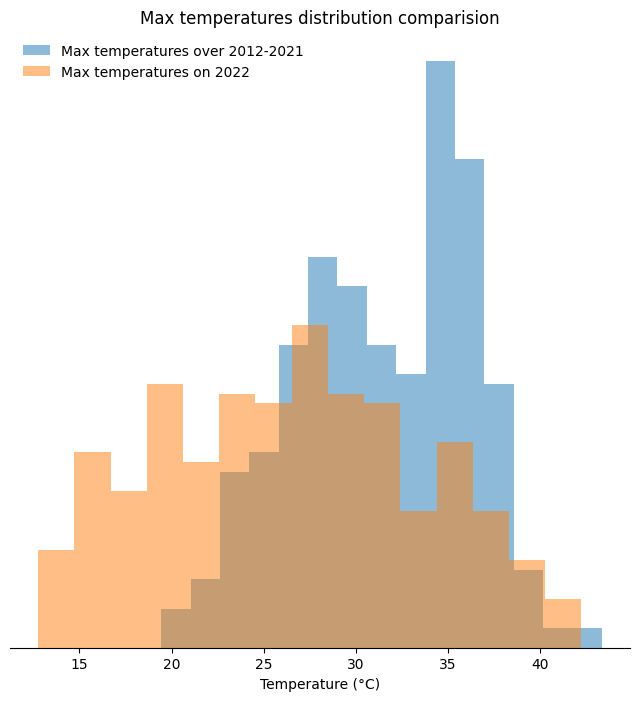

In [84]:
plt.figure(figsize=(8,8))

plt.hist(df_max['TMAX'], bins= 15, label= 'Max temperatures over 2012-2021', alpha= 0.5)
plt.hist(df_2022_max['TMAX'], bins= 15, label= 'Max temperatures on 2022', alpha= 0.5)
legend = plt.legend()
plt.xlabel('Temperature (°C)')
plt.title('Max temperatures distribution comparision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax = plt.gca()
ax.set_yticks([])
legend.get_frame().set_linewidth(0)
plt.show()

In [61]:
np.array(df_2022_max.index)

array([  1,   2,   3,   4,   5,   8,  10,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  25,  26,  27,  31,  33,  34,  35,
        36,  37,  38,  41,  42,  43,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  75,  77,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  91,  93,  94,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 122, 123, 127, 128, 129, 130, 131, 133,
       134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 151, 152, 153, 154, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 204, 205, 206,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

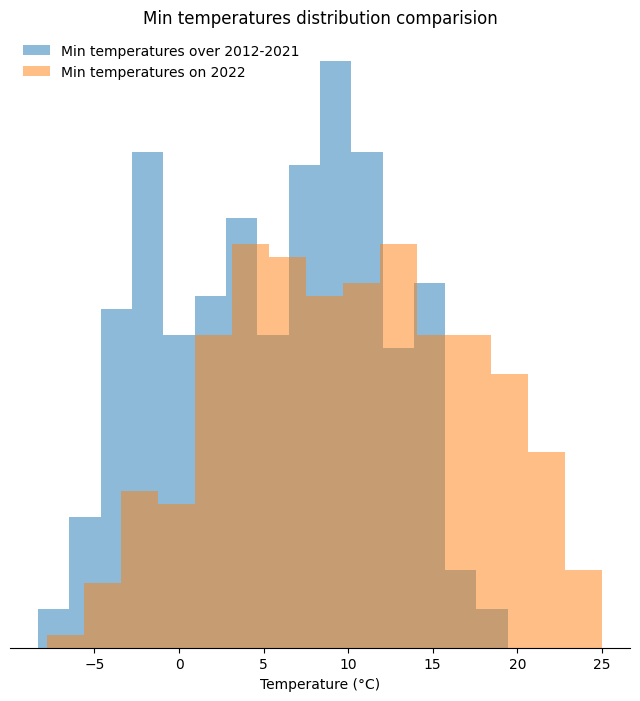

In [82]:
plt.figure(figsize=(8,8))

plt.hist(df_min['TMIN'], bins= 15, label= 'Min temperatures over 2012-2021', alpha= 0.5)
plt.hist(df_2022_min['TMIN'], bins= 15, label= 'Min temperatures on 2022', alpha= 0.5)
legend= plt.legend()
plt.xlabel('Temperature (°C)')
plt.title('Min temperatures distribution comparision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax = plt.gca()
ax.set_yticks([])
legend.get_frame().set_linewidth(0)
plt.show()